# Insurance Charges Prediction using Multiple Linear Regression

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import simplefilter
simplefilter(action='ignore')

In [3]:
df = pd.read_csv('new_insurance_data.csv')

## Data Inspection

In [4]:
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
df.shape

(1338, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [7]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [8]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
for i in df.describe(include='object'):
    print(df[i].value_counts())
    print()

sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



# Data Preprocessing

## Handling Null Values

In [10]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

## Handling Duplicated

In [13]:
# Check for duplicates
print(f"Number of duplicate rows:{df.duplicated().sum()}")

Number of duplicate rows:0


## Converting datatypes

In [14]:
df['age'] = df['age'].apply(int)

In [15]:
df['children'] = df['children'].apply(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1287 non-null   int64  
 1   sex                              1287 non-null   object 
 2   bmi                              1287 non-null   float64
 3   children                         1287 non-null   int64  
 4   smoker                           1287 non-null   object 
 5   Claim_Amount                     1287 non-null   float64
 6   past_consultations               1287 non-null   float64
 7   num_of_steps                     1287 non-null   float64
 8   Hospital_expenditure             1287 non-null   float64
 9   NUmber_of_past_hospitalizations  1287 non-null   float64
 10  Anual_Salary                     1287 non-null   float64
 11  region                           1287 non-null   object 
 12  charges                  

# EDA(Exploratory Data Analysis)

In [17]:
num_column = df.select_dtypes(exclude='object').columns
num_column

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')

In [18]:
cat_column = df.select_dtypes(include='object').columns
cat_column

Index(['sex', 'smoker', 'region'], dtype='object')

## Univariate

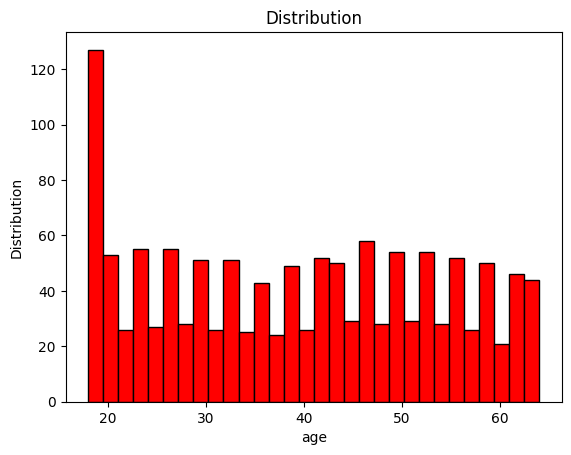

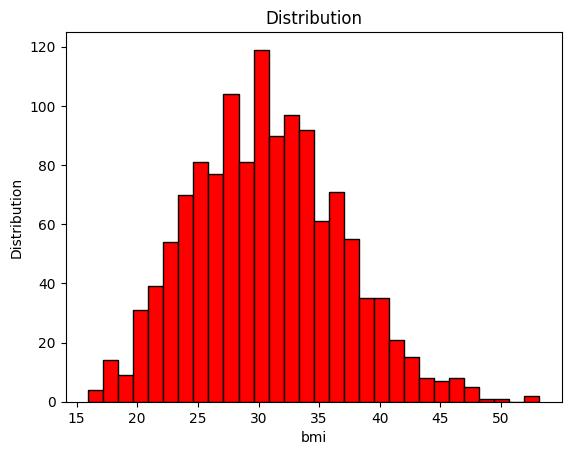

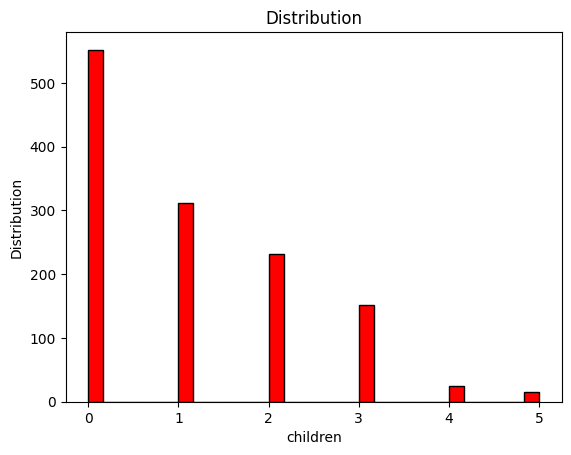

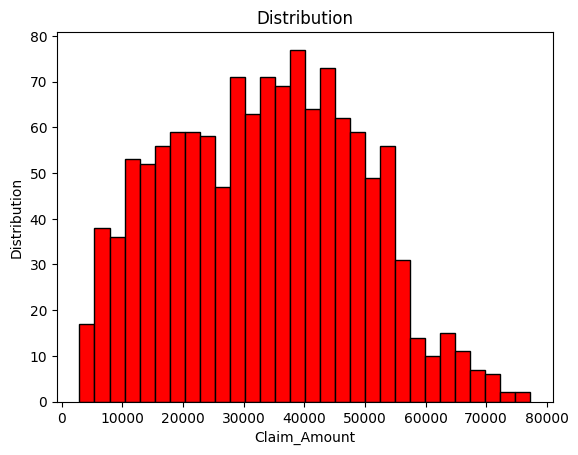

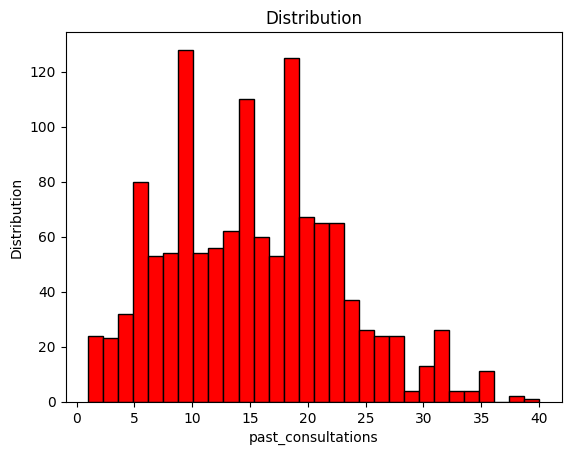

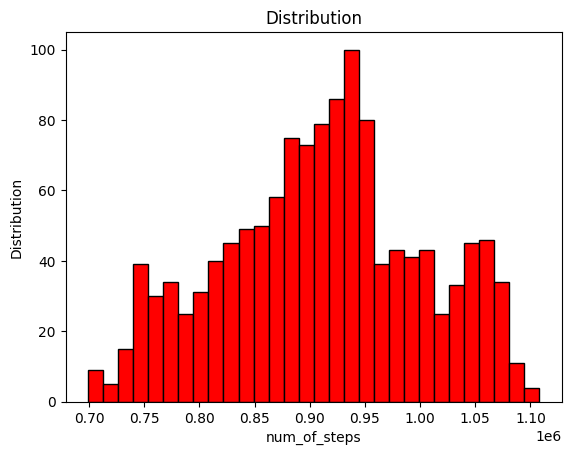

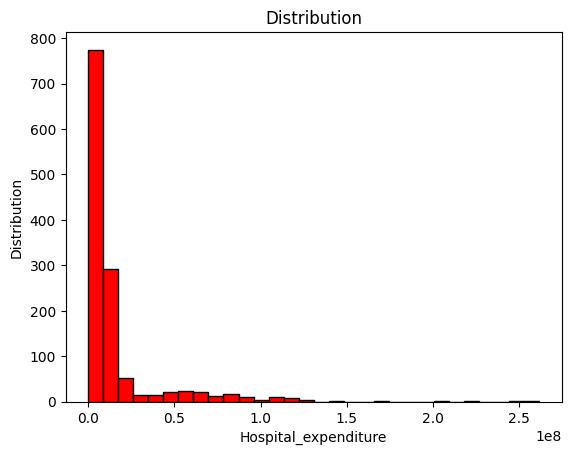

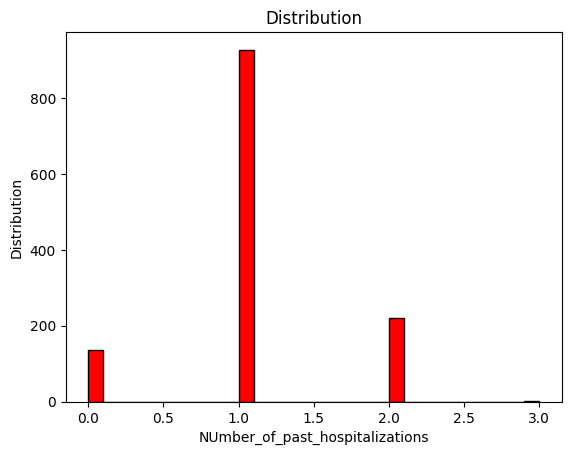

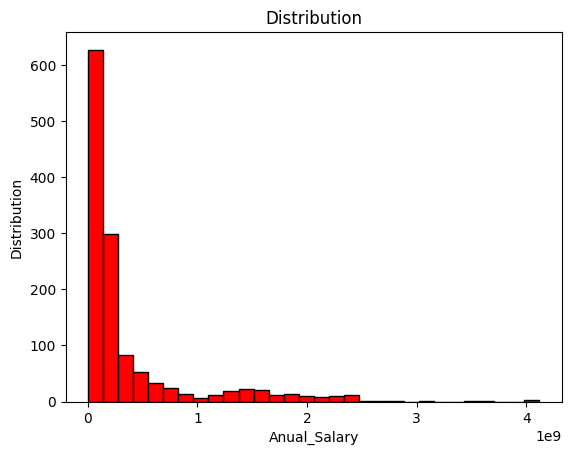

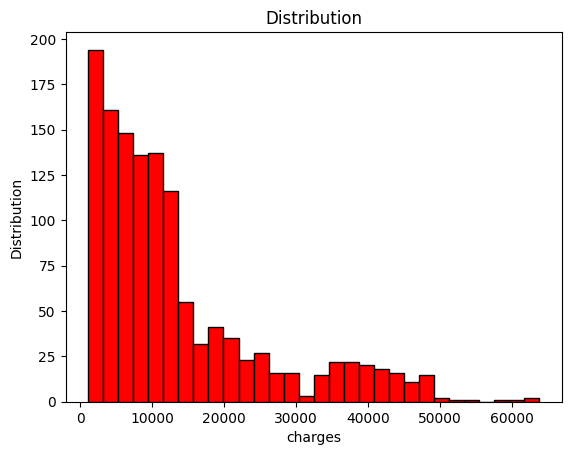

In [19]:
for i in num_column:
    plt.hist(df[i],bins=30,edgecolor='black',color='red')
    plt.xlabel(i)
    plt.ylabel('Distribution')
    plt.title('Distribution')
    plt.show()

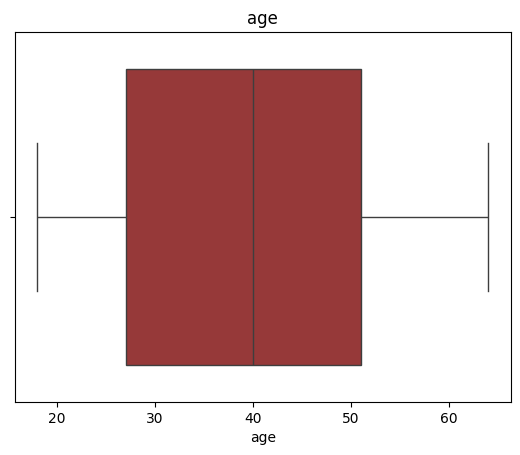

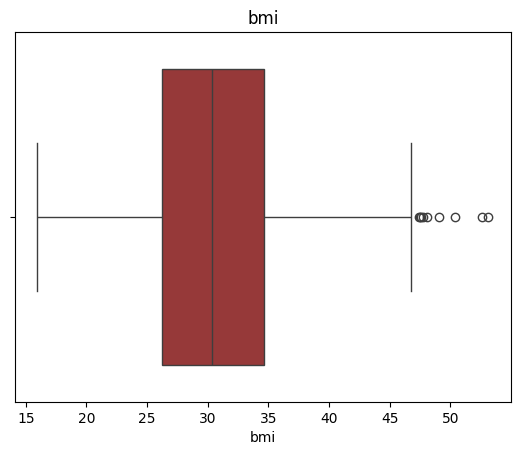

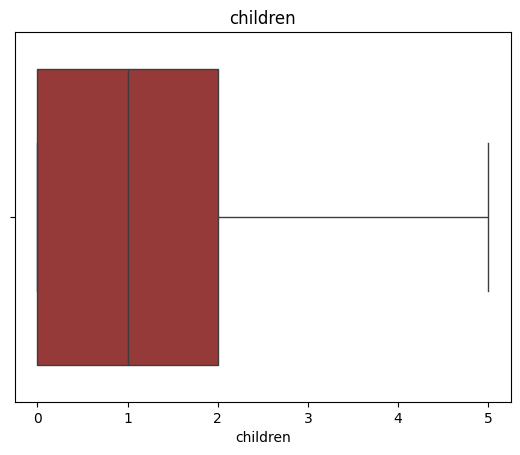

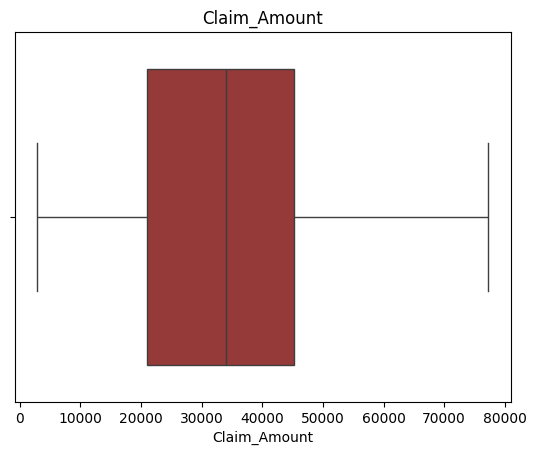

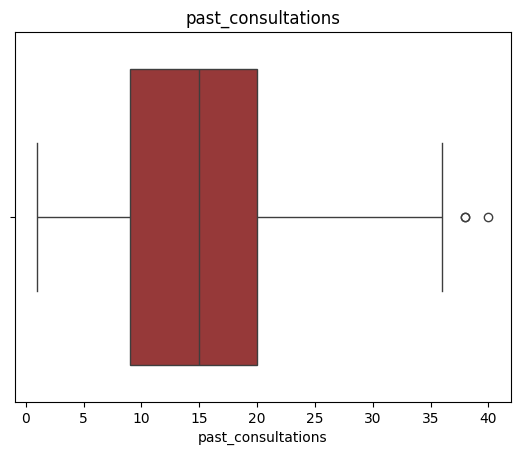

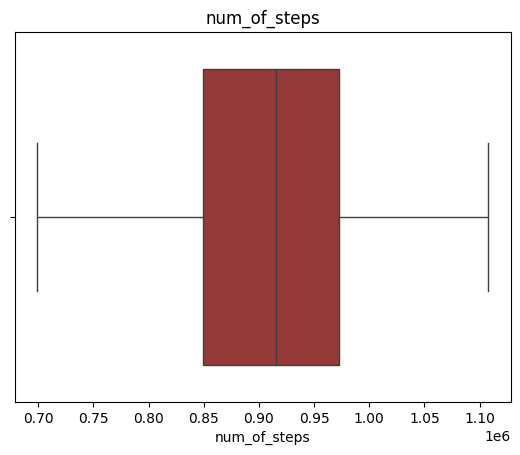

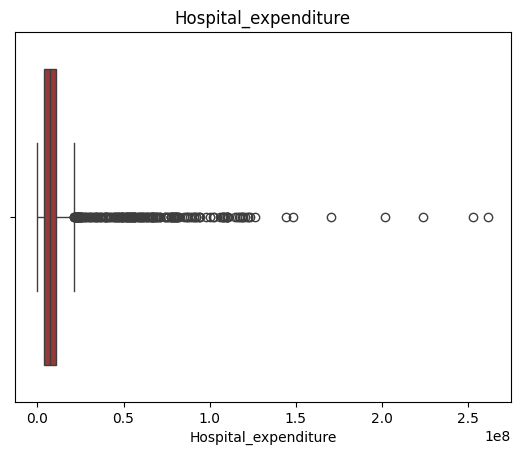

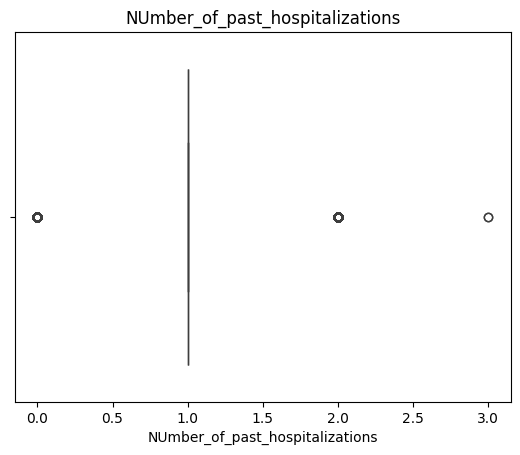

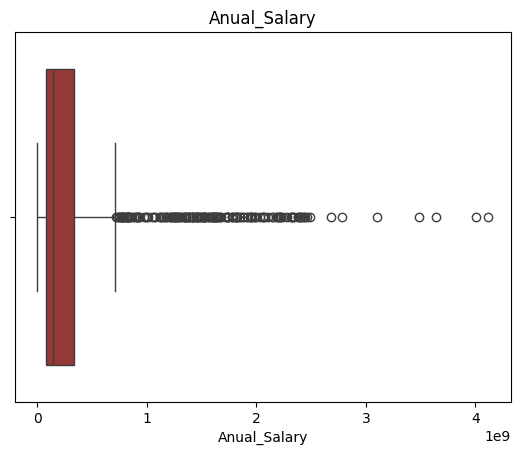

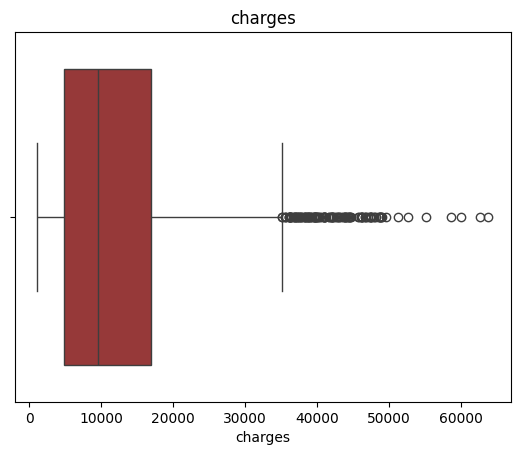

In [20]:
for i in num_column:
    sns.boxplot(data=df, x=i, color='brown')
    plt.title(i)
    plt.show()

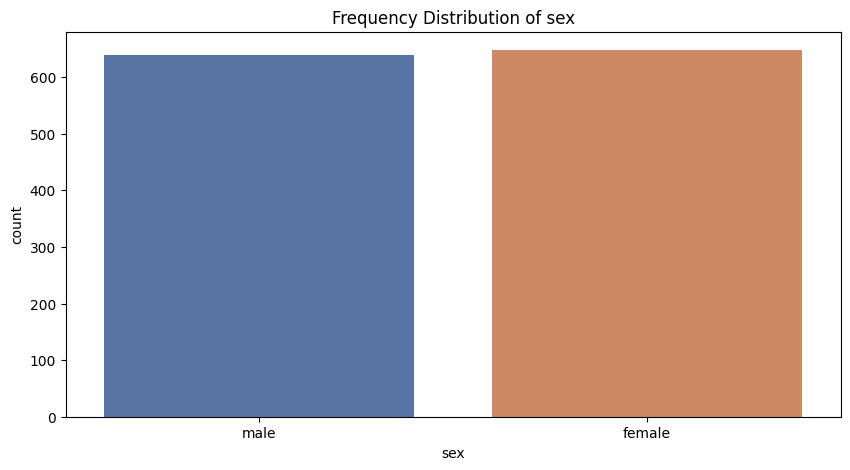

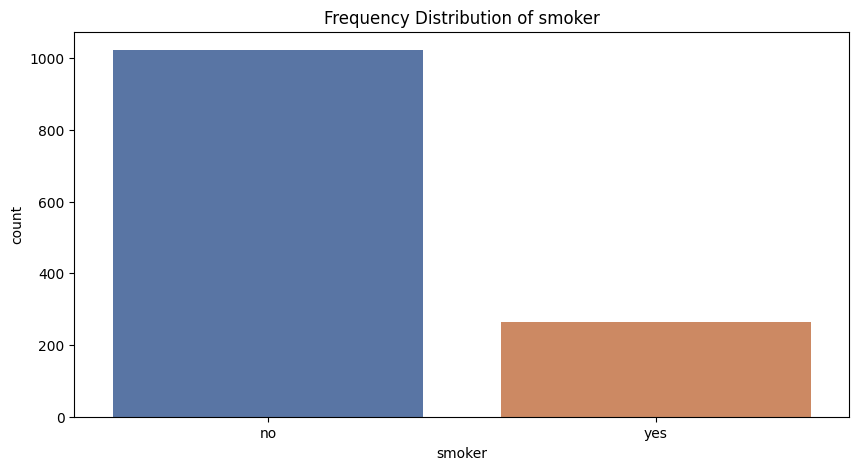

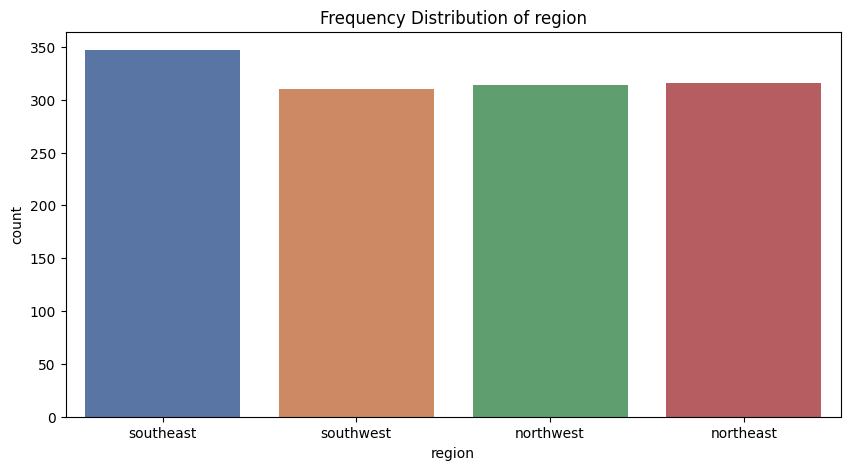

In [21]:
for i in cat_column:
    plt.figure(figsize=(10,5))   #(width,height)
    sns.countplot(data=df, x=i, palette='deep')
    plt.title(f'Frequency Distribution of {i}')
    plt.xlabel(i)

## Bivariate analysis

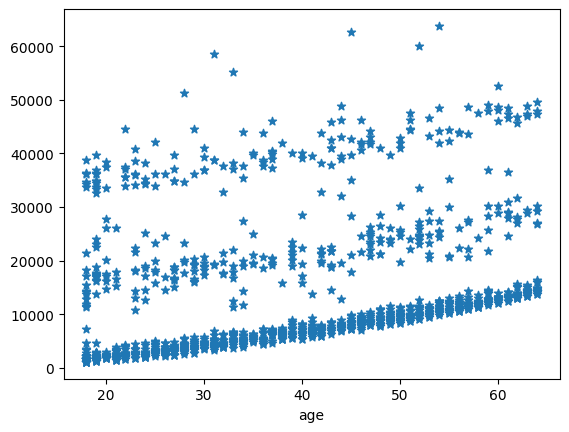

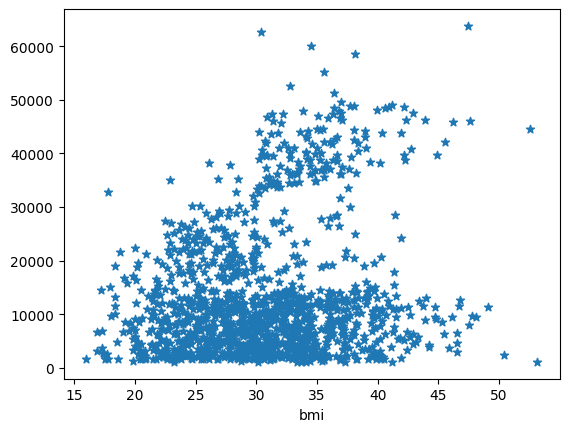

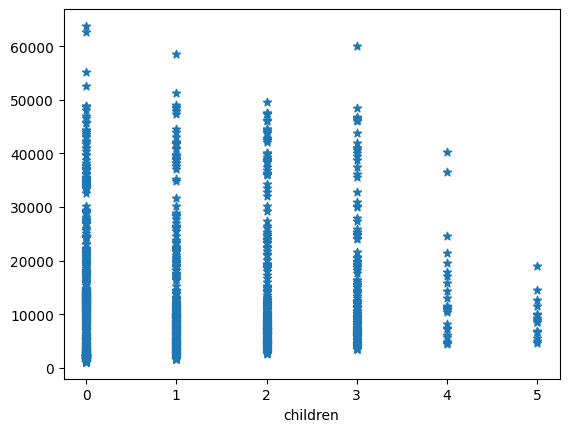

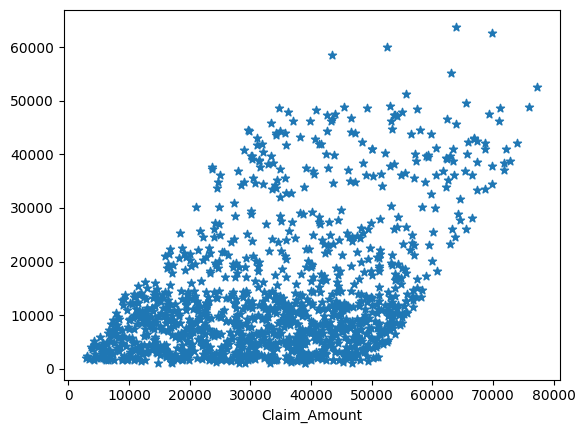

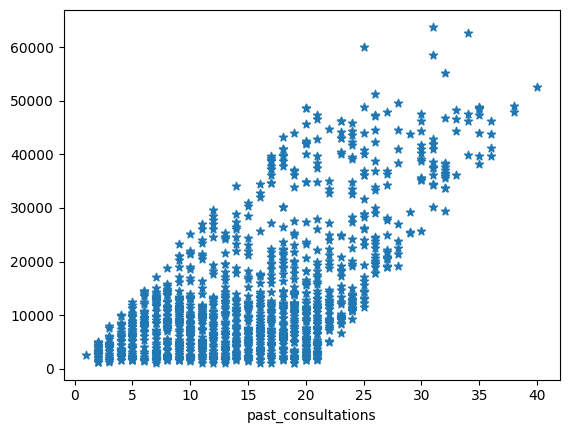

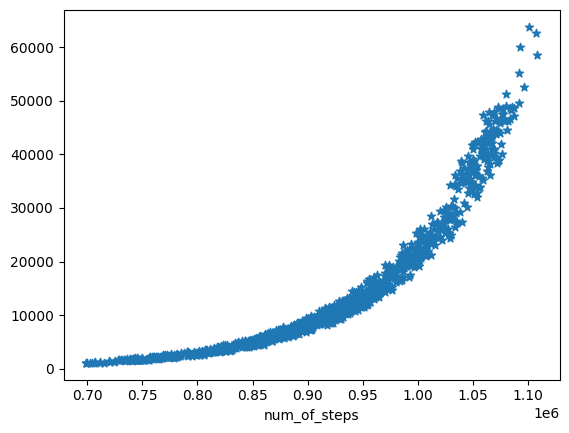

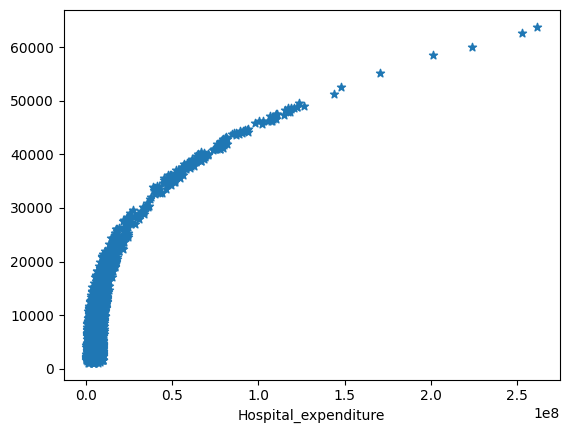

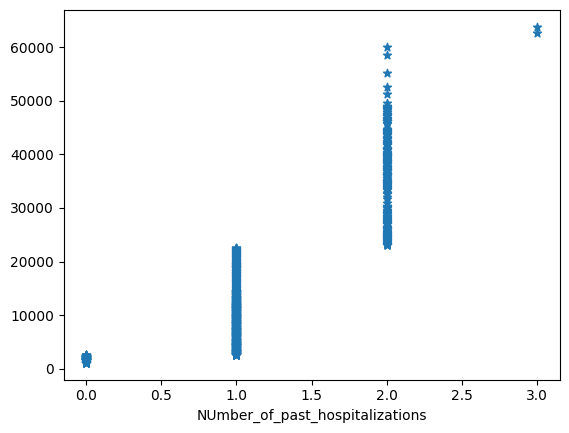

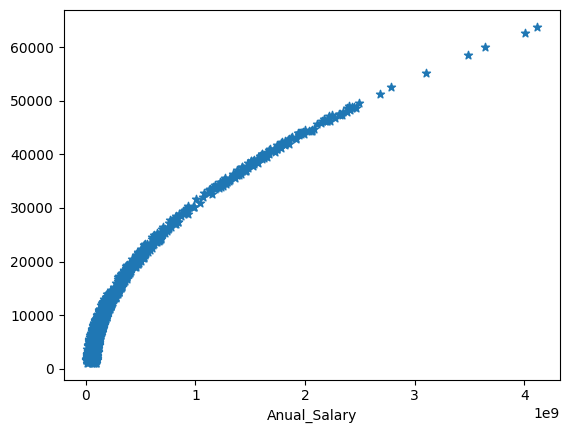

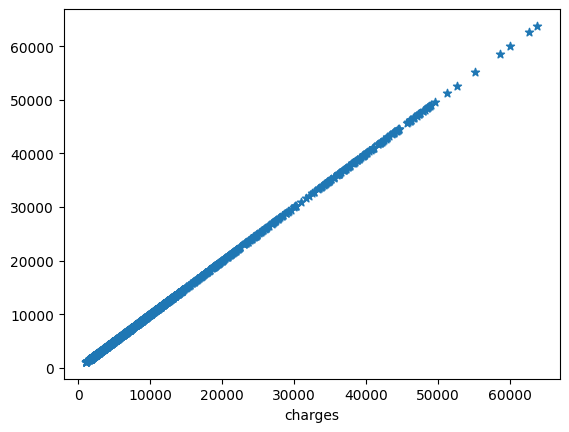

In [22]:
for i in num_column:
    plt.scatter(df[i],df['charges'],marker='*')
    plt.xlabel(i)
    plt.show()

## Categorical plot

### Count plot

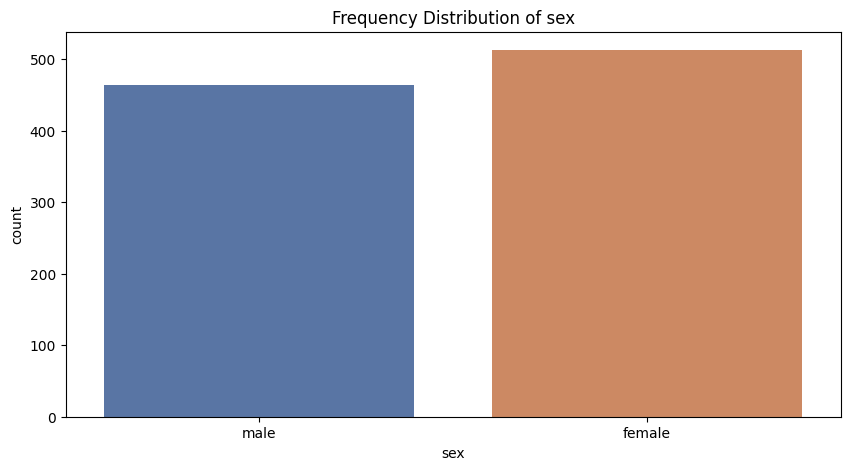

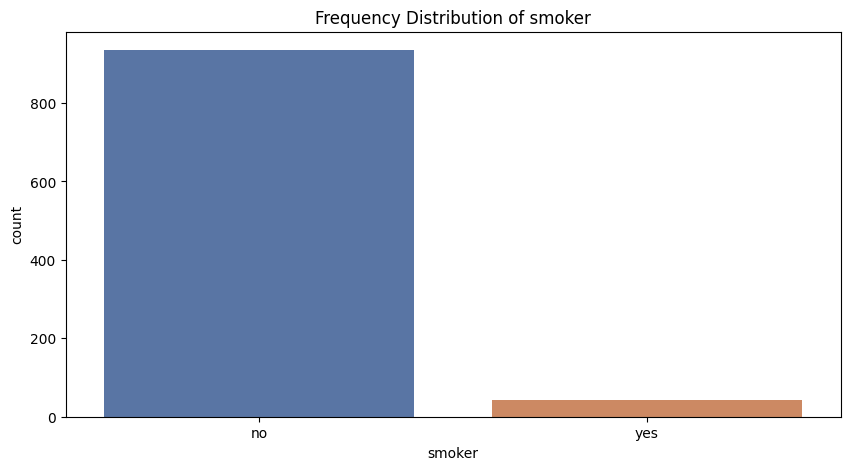

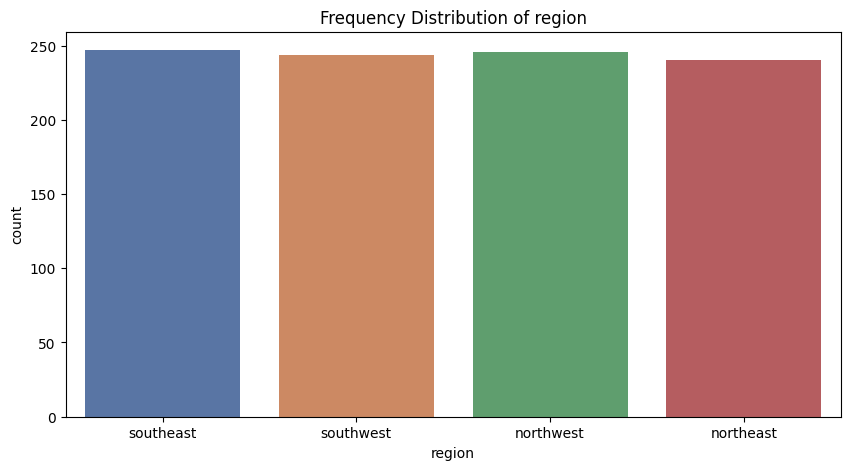

In [31]:
for i in cat_column:
    plt.figure(figsize=(10,5))   #(width,height)
    sns.countplot(data=df, x=i, palette='deep')
    plt.title(f'Frequency Distribution of {i}')
    plt.xlabel(i)

## Violin plot

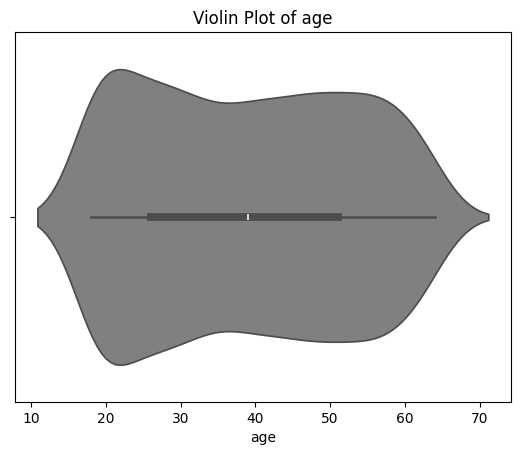

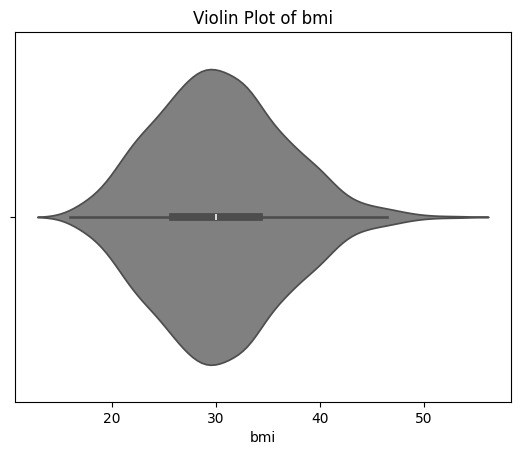

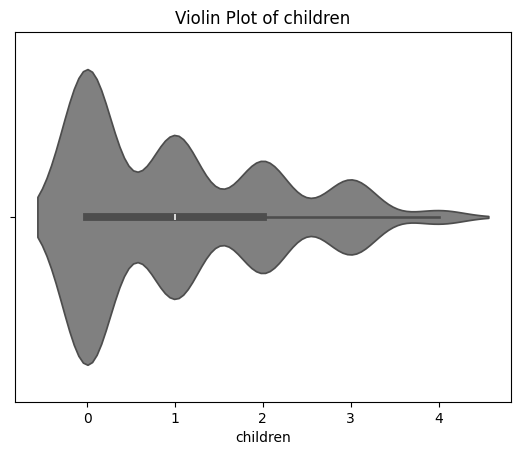

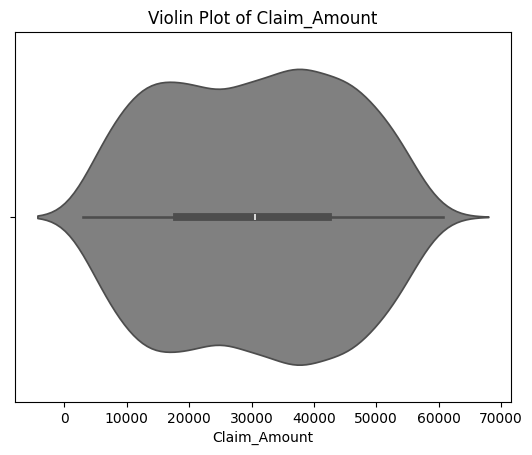

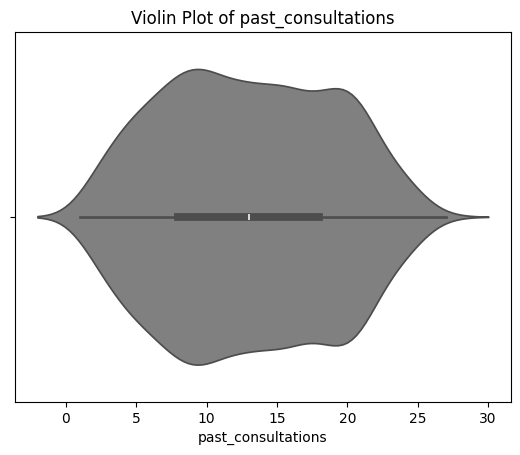

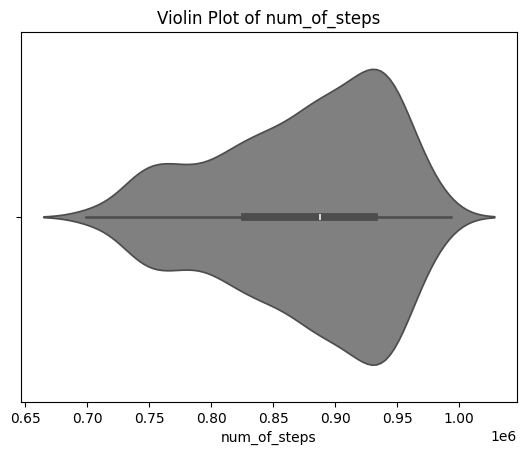

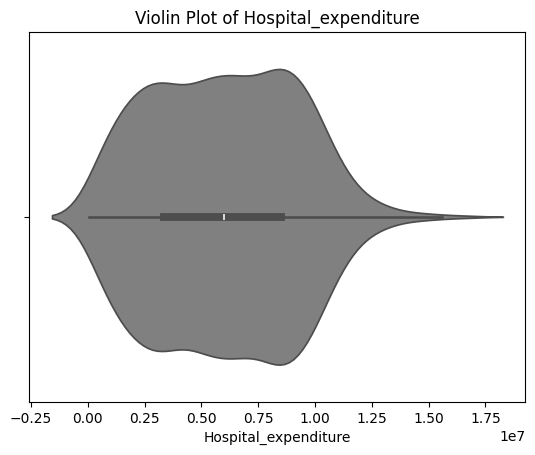

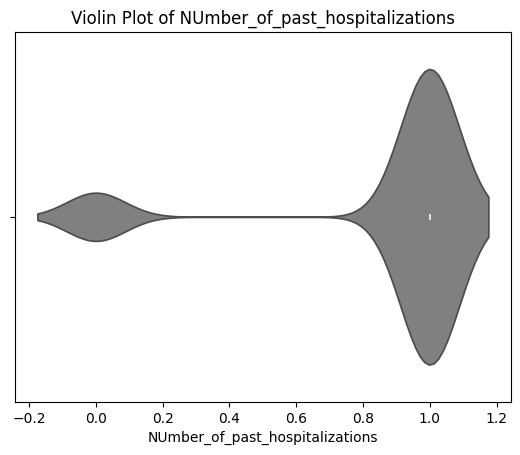

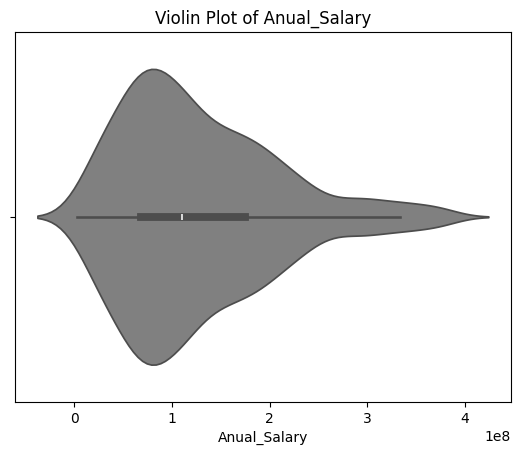

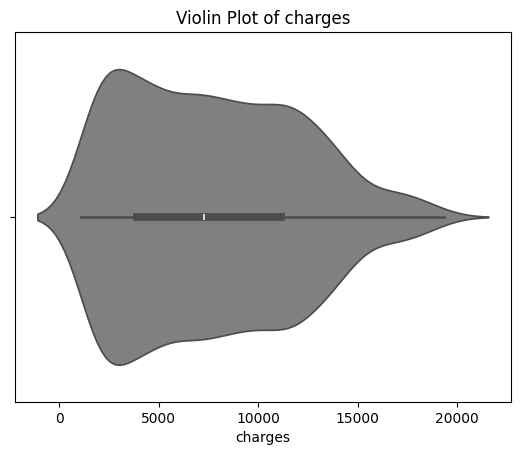

In [32]:
for i in num_column:
    sns.violinplot(data=df, x=i, color='grey')
    plt.title(f'Violin Plot of {i}')
    plt.show()

## Pie chart

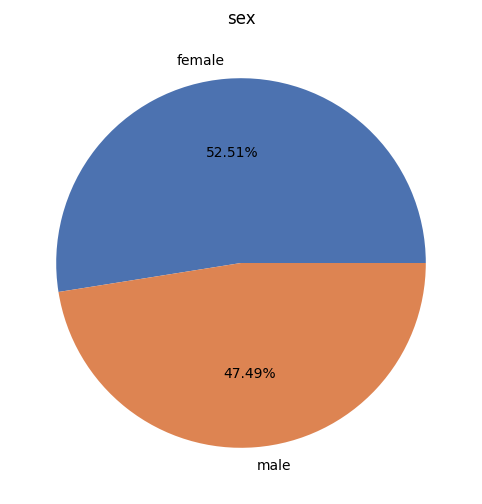

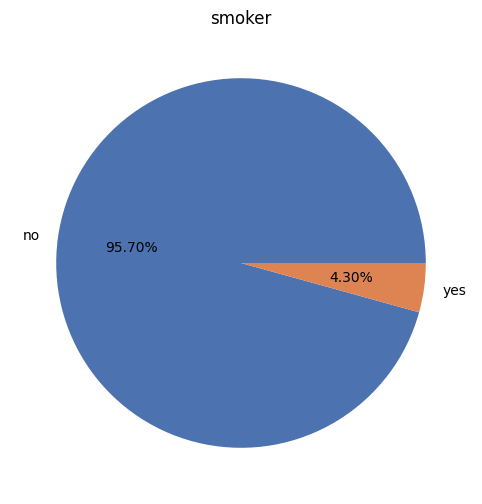

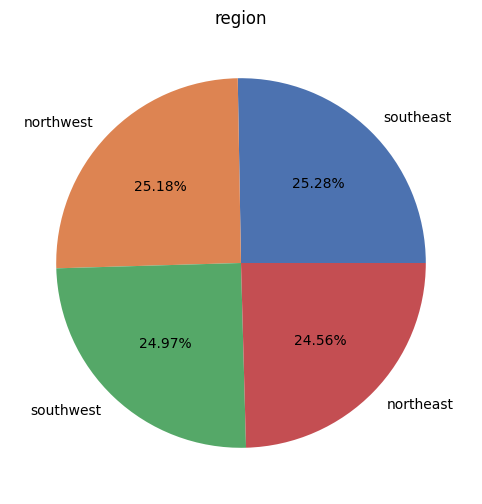

In [33]:
for i in cat_column:
    plt.figure(figsize=(10,6))   #(width,height)
    counts = df[i].value_counts()
    palette_color = sns.color_palette('deep')
    plt.pie(counts,labels=counts.index,autopct='%.2f%%',colors=palette_color)
    plt.title(i)

## Multi-variate analysis

In [23]:
df[num_column].corr()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.108536,0.043423,0.110112,0.162433,0.510655,0.124020,0.352799,0.158956,0.283152
bmi,0.108536,1.000000,0.009907,0.096924,0.123539,0.131594,0.252588,0.137030,0.235914,0.194420
children,0.043423,0.009907,1.000000,0.039960,0.053911,0.155004,0.022253,0.177986,0.032490,0.065703
Claim_Amount,0.110112,0.096924,0.039960,1.000000,0.269426,0.399889,0.372890,0.380476,0.411221,0.437752
past_consultations,0.162433,0.123539,0.053911,0.269426,1.000000,0.562708,0.537832,0.504391,0.596954,0.629160
num_of_steps,0.510655,0.131594,0.155004,0.399889,0.562708,1.000000,0.623659,0.845985,0.739091,0.891532
Hospital_expenditure,0.124020,0.252588,0.022253,0.372890,0.537832,0.623659,1.000000,0.657684,0.969218,0.871482
NUmber_of_past_hospitalizations,0.352799,0.137030,0.177986,0.380476,0.504391,0.845985,0.657684,1.000000,0.745324,0.824245
Anual_Salary,0.158956,0.235914,0.032490,0.411221,0.596954,0.739091,0.969218,0.745324,1.000000,0.953653
charges,0.283152,0.194420,0.065703,0.437752,0.629160,0.891532,0.871482,0.824245,0.953653,1.000000


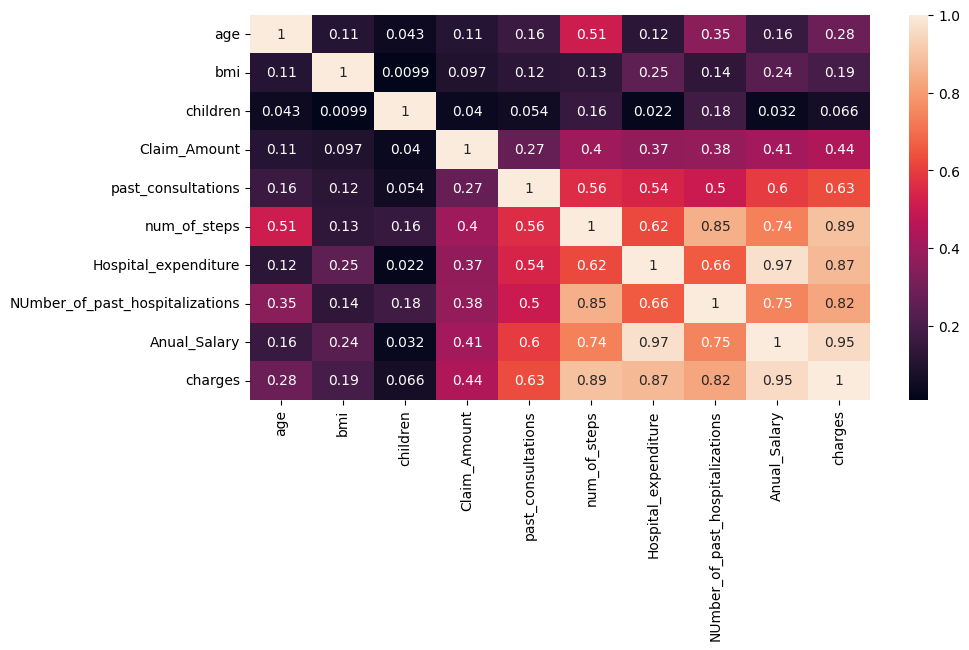

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df[num_column].corr(),annot=True)
plt.show()

## Outlier Detection and Removal

### Outlier Removal using IQR

In [25]:
df['bmi'].skew()

0.304406762124439

In [26]:
df['num_of_steps'].skew()

-0.08820786596130657

In [27]:
normal = []
skew = []
for i in num_column:
    if df[i].skew()<0.5:
        normal.append(i)
    else:
        skew.append(i)

In [28]:
for i in skew:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    df = df[(df[i]>lower_bound) & (df[i]<upper_bound)]

In [29]:
df.shape

(977, 13)

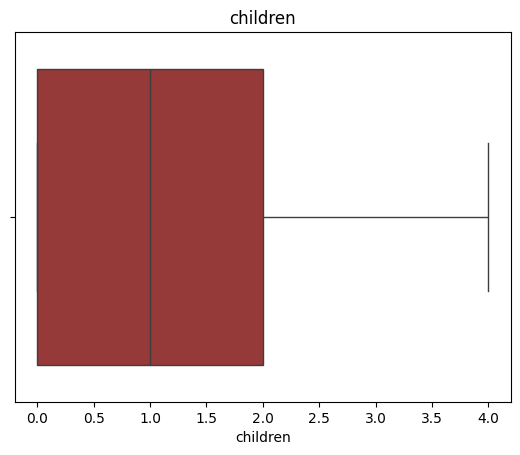

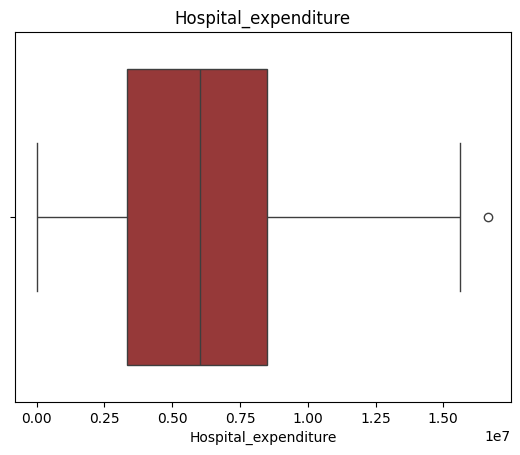

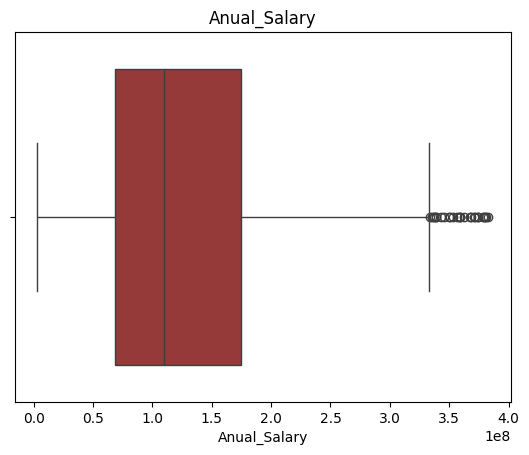

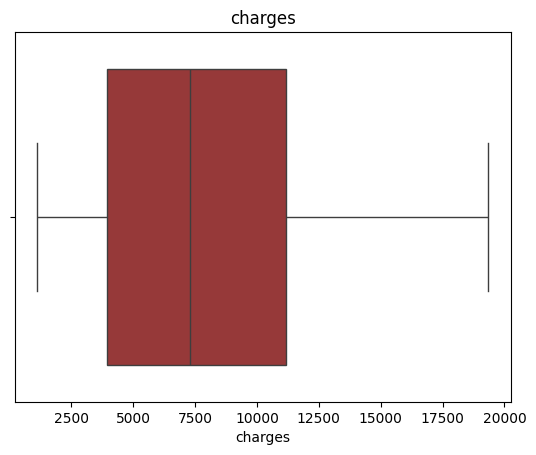

In [30]:
for i in skew:
    sns.boxplot(data=df, x=i, color='brown')
    plt.title(i)
    plt.show()

### Outlier Removal using Z_Score

In [42]:
from scipy.stats import zscore

In [34]:
def z_score(df):
    for i in normal:
        mean = df[i].mean()
        for j in df[i]:
            v = j-mean
            sd = stats.tstd(df[i])
        

In [37]:
df_zscore = df[normal].apply(zscore)
df_zscore.describe()

,age,bmi,Claim_Amount,past_consultations,num_of_steps,NUmber_of_past_hospitalizations
count,9.770000e+02,9.770000e+02,9.770000e+02,9.770000e+02,9.770000e+02,9.770000e+02
mean,-5.818160e-17,-3.018170e-16,4.363620e-17,1.163632e-16,7.563607e-16,-2.036356e-16
std,1.000512e+00,1.000512e+00,1.000512e+00,1.000512e+00,1.000512e+00,1.000512e+00
min,-1.472555e+00,-2.349815e+00,-1.907897e+00,-2.002905e+00,-2.559717e+00,-2.476164e+00
25%,-9.078106e-01,-7.225372e-01,-8.518054e-01,-8.351412e-01,-6.949210e-01,4.038505e-01
50%,9.898922e-03,-5.449682e-02,1.885263e-02,-1.024504e-03,1.922383e-01,4.038505e-01
75%,8.570154e-01,6.257787e-01,8.332935e-01,8.330922e-01,8.210583e-01,4.038505e-01
max,1.774725e+00,3.713936e+00,2.117202e+00,2.334502e+00,1.735160e+00,4.038505e-01


In [38]:
df['bmi'] = df['bmi'][(df_zscore['bmi']>-3) & (df_zscore['bmi']<3)]

In [39]:
df.isnull().sum()

age                                0
sex                                0
bmi                                3
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [40]:
df.dropna(inplace=True)

# Feature Engineering

In [43]:
for i in cat_column:
    print(df[i].value_counts())
    print()

sex
female    513
male      461
Name: count, dtype: int64

smoker
no     932
yes     42
Name: count, dtype: int64

region
northwest    246
southeast    244
southwest    244
northeast    240
Name: count, dtype: int64



In [46]:
df['sex'] = df['sex'].replace({'male':0,'female':1})
df['smoker'] = df['smoker'].replace({'no':0,'yes':1})

In [48]:
for i in cat_column:
    print(df[i].value_counts())
    print()

sex
1    513
0    461
Name: count, dtype: int64

smoker
0    932
1     42
Name: count, dtype: int64

region
northwest    246
southeast    244
southwest    244
northeast    240
Name: count, dtype: int64



In [56]:
dummies = pd.get_dummies(df['region'],drop_first=True,dtype='int64')
dummies

,northwest,southeast,southwest
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1036,0,1,0
1041,0,0,1
1046,0,1,0
1048,0,0,1


In [62]:
df_final = pd.concat([df, dummies],axis=1)
df_final

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges,northwest,southeast,southwest
0,18,0,23.21,0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390,0,1,0
1,18,0,30.14,0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660,0,1,0
2,18,0,33.33,0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070,0,1,0
3,18,0,33.66,0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940,0,1,0
4,18,0,34.10,0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43,0,20.13,2,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,southeast,18767.73770,0,1,0
1041,24,1,27.60,0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,southwest,18955.22017,0,0,1
1046,29,1,27.94,1,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960,0,1,0
1048,31,0,25.90,3,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400,0,0,1


In [63]:
df_final.drop('region',inplace=True,axis=1)

In [64]:
df_final

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,northwest,southeast,southwest
0,18,0,23.21,0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,1121.87390,0,1,0
1,18,0,30.14,0,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,1131.50660,0,1,0
2,18,0,33.33,0,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,1135.94070,0,1,0
3,18,0,33.66,0,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,1136.39940,0,1,0
4,18,0,34.10,0,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,1137.01100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,43,0,20.13,2,1,44184.65414,19.0,984247.0,1.473451e+07,1.0,3.687871e+08,18767.73770,0,1,0
1041,24,1,27.60,0,0,27184.27803,9.0,980010.0,1.266673e+07,1.0,3.743228e+08,18955.22017,0,0,1
1046,29,1,27.94,1,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,19107.77960,0,1,0
1048,31,0,25.90,3,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,19199.94400,0,0,1


# Train_test_split

In [72]:
x = df_final.drop('charges',axis=1)
y = df.charges

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8)

In [76]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((779, 14), (195, 14), (779,), (195,))

# Model Selection

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [78]:
model.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

## Metrics Formula

## Mean Squared Error

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
y_pred = model.predict(x_test)

In [84]:
mse = mean_squared_error(y_test,y_pred)
mse

582574.4661118364

## Mean Absolute Error

In [85]:
mae = mean_absolute_error(y_test,y_pred)
mae

595.7519980191458

## R Squared Error

In [ ]:
r2_score = r2_score(y_test,y_pred)

In [96]:
r2_score

0.9739320729629725

## Accuracy

In [97]:
model.score(x_test,y_test)

0.9739320729629725